In [1]:
# libraries
from Epydemix import Epydemix
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime


# Toy Model with Interventions

In [2]:
model = Epydemix()

# simulation dates
start_date, end_date = datetime(2022, 1, 1), datetime(2022, 12, 31)

# Number of stochastic simulations 
Nsim = 10

# define epidemic model (SEIR)
model.add_interaction("S", "E", "I", 0.05, rate_name="beta")
model.add_spontaneous("E", "I", 1. / 4., rate_name="eps")
model.add_spontaneous("I", "R", 1. / 2.5, rate_name="mu")

# simulate without interventions
simulations = model.simulate(start_date=start_date, 
                             end_date=end_date, Nsim=Nsim, 
                             S=model.basin.Nk - np.ones(model.n_age),
                             I=np.ones(model.n_age),
                             R=np.zeros(model.n_age))

# simulate with interventions
model.add_intervention(start_date=datetime(2022, 3, 1), 
                       end_date=datetime(2022, 6, 1), 
                       layer="school", 
                       factor=0.344)

model.add_intervention(start_date=datetime(2022, 3, 15), 
                       end_date=datetime(2022, 9, 1), 
                       layer="work", 
                       factor=0.5)

model.add_intervention(start_date=datetime(2022, 4, 1), 
                       end_date=datetime(2022, 8, 1), 
                       layer="community", 
                       factor=0.8)

simulations_npis = model.simulate(start_date=start_date, 
                             end_date=end_date, Nsim=Nsim, 
                             S=model.basin.Nk - np.ones(model.n_age),
                             I=np.ones(model.n_age),
                             R=np.zeros(model.n_age))

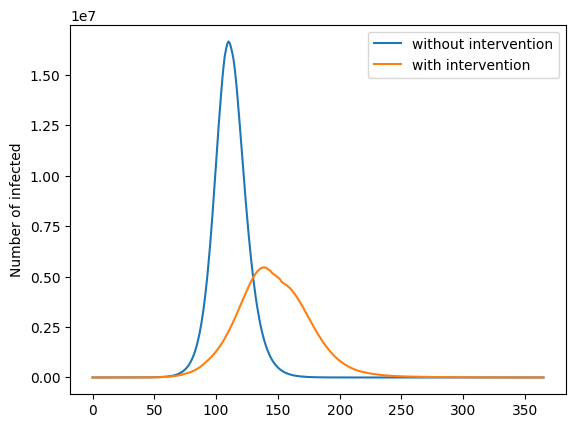

In [3]:
plt.plot(np.quantile(simulations, axis=0, q=0.5).sum(axis=2)[:, 2], label="without intervention")
plt.plot(np.quantile(simulations_npis, axis=0, q=0.5).sum(axis=2)[:, 2], label="with intervention")
plt.ylabel("Number of infected")
plt.legend()

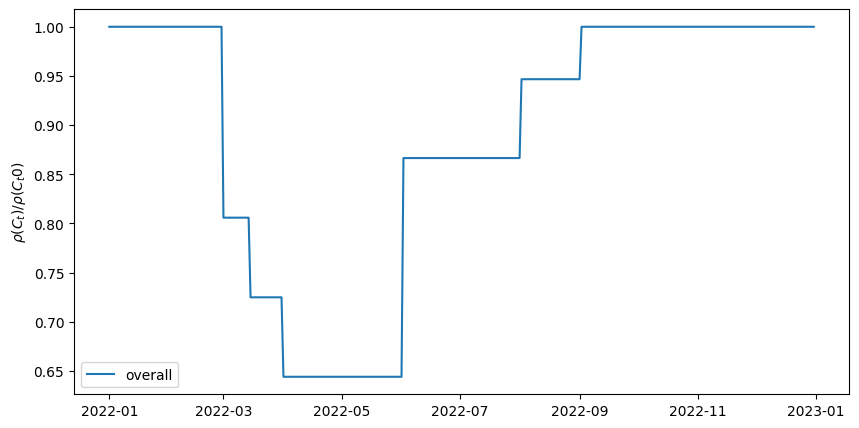

In [4]:
# plot impact of intervention on spectral radius 
model.plot_spectral_radius()

# Complex Compartmentalization Setup

In [5]:
model = Epydemix()

# simulation dates
start_date, end_date = datetime(2022, 1, 1), datetime(2022, 12, 31)

# Number of stochastic simulations 
Nsim = 10

# define epidemic model (SEPIAR)
model.add_interaction("S", "E", "I", 0.05, rate_name="beta")
model.add_interaction("S", "E", "IA", 0.05 * 0.7, rate_name="beta_asymp")
model.add_spontaneous("E", "P", 1. / 2., rate_name="gamma")
model.add_spontaneous("P", "I", 1. / 2. * 0.7, rate_name="eps_inf")
model.add_spontaneous("P", "IA", 1. / 2. * 0.3, rate_name="eps_asymp")
model.add_spontaneous("I", "R", 1. / 2.5, rate_name="mu")
model.add_spontaneous("IA", "RA", 1. / 2.5, rate_name="mu_asymp")

# simulate without interventions
simulations = model.simulate(start_date=start_date, 
                             end_date=end_date, Nsim=Nsim, 
                             S=model.basin.Nk - np.ones(model.n_age),
                             I=np.ones(model.n_age),
                             R=np.zeros(model.n_age))

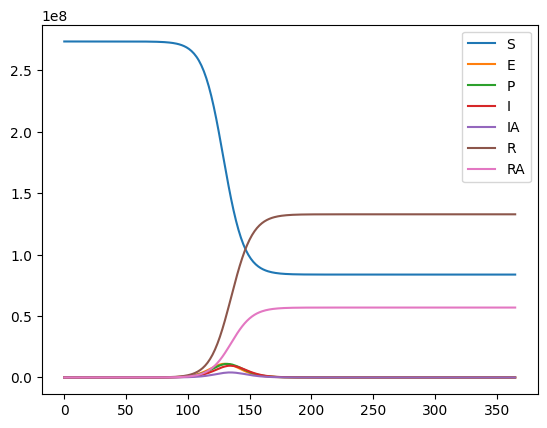

In [6]:
for k, v in model.pos.items(): 
    plt.plot(np.quantile(simulations, axis=0, q=0.5).sum(axis=2)[:, v], label=k)
plt.legend()

In [8]:
model = Epydemix()

# define epidemic model (SEIR)
model.add_interaction("S", "E", "I1", 0.05, rate_name="beta1")
model.add_interaction("S", "E", "I2", 0.05, rate_name="beta2")

In [20]:
list(model.transitions.edges(data=True))[0]

('S', 'E', {'agent': 'I', 'rate': 0.05, 'rate_name': 'beta'})

In [14]:
model = Epydemix()

# simulation dates
start_date, end_date = datetime(2022, 1, 1), datetime(2022, 12, 31)

# Number of stochastic simulations 
Nsim = 1

# define epidemic model (SEIR)
model.add_interaction("S", "E", "I", 0.05, rate_name="beta")
model.add_spontaneous("E", "I", 1. / 4., rate_name="eps")
model.add_spontaneous("I", "R", 1. / 2.5, rate_name="mu")

In [15]:
%timeit model.simulate(start_date=start_date,  end_date=end_date, Nsim=Nsim,  S=model.basin.Nk - np.ones(model.n_age),  I=np.ones(model.n_age),            R=np.zeros(model.n_age))

153 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
